<a href="https://colab.research.google.com/github/Tuchsanai/152-478-Introduction-to-Deep-Learning-for-Artificial-Intelligence-Engineering/blob/main/05_Image_Video_OpenCV/05_yolov5_inference/yolov5_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import torch
from skimage import io
from skimage import io
import matplotlib.pyplot as plt
import cv2

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-1-28 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


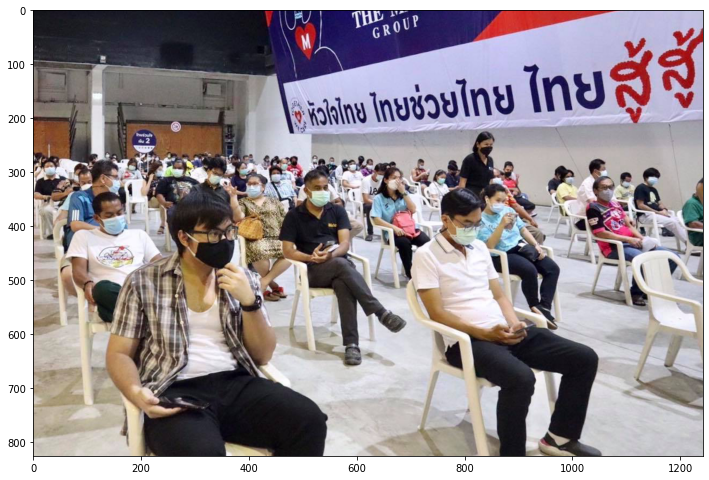

In [2]:
url1 = "https://raw.githubusercontent.com/Tuchsanai/152-478-Introduction-to-Deep-Learning-for-Artificial-Intelligence-Engineering/main/05_Image_Video_OpenCV/05_yolov5_inference/demo1.jpg"

img1 = io.imread(url1)

plt.figure(figsize=(12,12))
plt.imshow(img1)

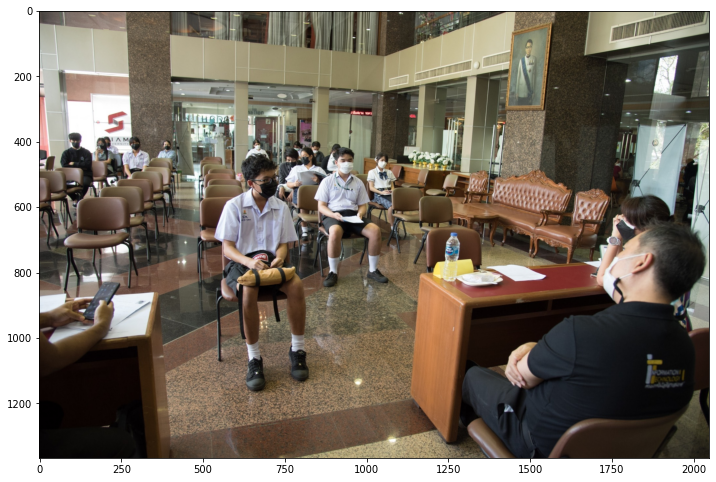

In [3]:
url2 = "https://raw.githubusercontent.com/Tuchsanai/152-478-Introduction-to-Deep-Learning-for-Artificial-Intelligence-Engineering/main/05_Image_Video_OpenCV/05_yolov5_inference/demo2.jpg"

img2 = io.imread(url2)

plt.figure(figsize=(12,12))
plt.imshow(img2)

In [4]:
# Inference
results1 = model(img1)
results2 = model(img2)



/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [5]:
results1.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,129.962845,320.895691,545.406921,825.024902,0.903863,0,person
1,701.919067,333.581665,1053.153687,827.000000,0.883964,0,person
2,459.287842,293.752411,693.404175,652.414978,0.864560,0,person
3,1108.010986,445.791138,1242.000000,698.894043,0.785354,56,chair
4,690.222290,492.958435,865.915771,814.646667,0.699188,56,chair
5,827.610840,322.716553,982.128174,582.997253,0.650527,0,person
6,1114.399780,293.411194,1219.150635,451.471100,0.632137,0,person
7,59.081413,335.814423,248.477478,584.096863,0.626784,0,person
8,1019.908752,366.581543,1117.768433,541.737000,0.587757,56,chair
9,1201.382935,308.907867,1241.794922,419.332306,0.552588,0,person


## คน

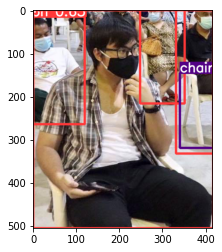

In [12]:
plt.imshow(  img1[320:825,129:545] )

# เก้าอี้ 


* 3	1108.010986	445.791138	1242.000000	698.894043	0.785354	56	chair


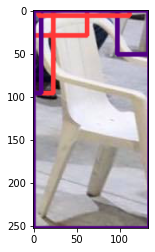

In [13]:
plt.imshow(  img1[445:698,1108:1242] )

In [24]:
url_sky = "https://raw.githubusercontent.com/Tuchsanai/152-478-Introduction-to-Deep-Learning-for-Artificial-Intelligence-Engineering/main/02_Crash-NumPy/skyimg.jpg"
imgsky      = io.imread(url_sky) 

imgsky.shape

(417, 626, 3)

In [18]:
imgman = img1[320:825,129:545]
imgman.shape

(505, 416, 3)

In [22]:
resized_imgman = cv2.resize(imgman,(96,96) , interpolation = cv2.INTER_AREA)
resized_imgman.shape

(96, 96, 3)

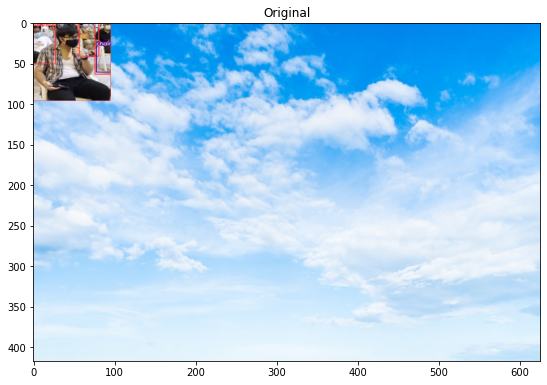

In [26]:
h,w,c  =resized_imgman.shape

imgsky[0:h,0:w,:] = resized_imgman

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(imgsky)

In [6]:
results2.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,541.169312,427.192963,826.059204,1162.879883,0.846555,0,person
1,1303.260986,615.128113,2027.761719,1353.557983,0.842678,0,person
2,66.930092,564.910645,306.354889,865.699585,0.823091,56,chair
3,847.106445,414.156158,1060.695068,852.813965,0.760287,0,person
4,254.517914,381.844788,338.441254,499.163727,0.680499,0,person
5,0.199243,854.520325,230.237015,1120.656982,0.625540,0,person
6,1602.789062,545.040955,1743.374634,772.790100,0.601952,56,chair
7,125.903549,823.969849,249.718704,949.679993,0.582607,67,cell phone
8,0.000000,487.025818,83.254822,715.887451,0.581828,56,chair
9,1066.909790,532.551697,1172.263428,734.961304,0.564976,56,chair


In [7]:
results1.save("results1")  # 
results2.save("results2")  # 

Saved 1 image to results1
Saved 1 image to results2


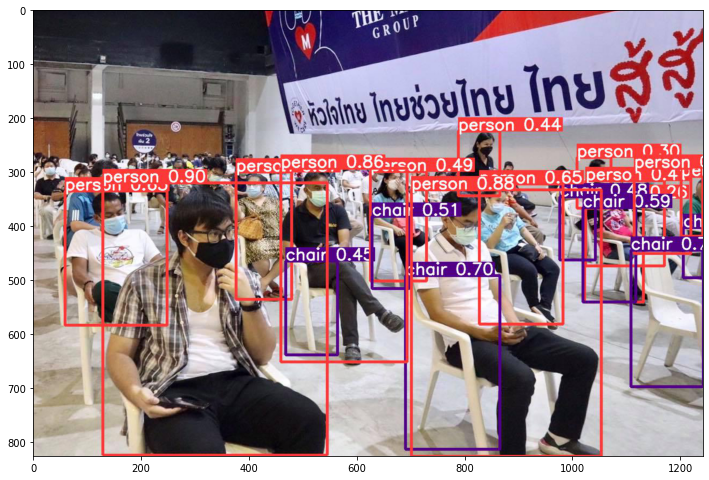

In [8]:
plt.figure(figsize=(12,12))
plt.imshow(io.imread("/content/results1/image0.jpg"))

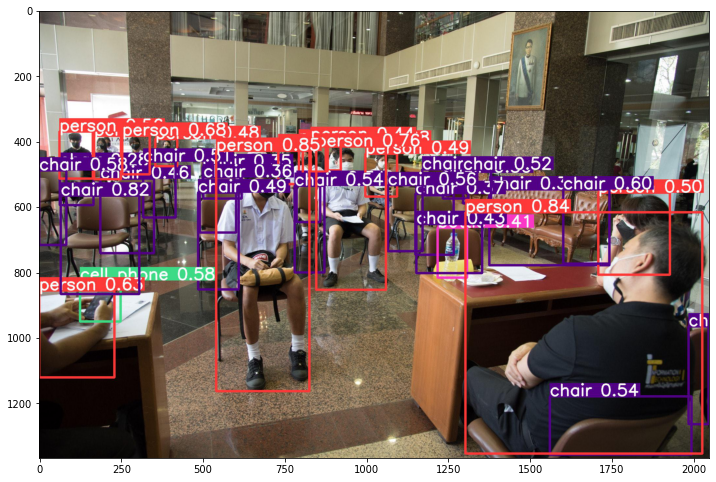

In [9]:
plt.figure(figsize=(12,12))
plt.imshow(io.imread("/content/results2/image0.jpg"))